In [57]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
# Loading the dataset
df = pd.read_csv("dataset_risk_analytics.csv")
df

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1


In [59]:
# Smmarize the characteristics of the data coluhmns to check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    5783 non-null   int64  
 1   monthly_income             5406 non-null   float64
 2   origination_score_band     5783 non-null   int64  
 3   TOB_months                 5406 non-null   float64
 4   closing_principal_balance  5406 non-null   float64
 5   original_loan_amount       5406 non-null   float64
 6   product                    5783 non-null   object 
 7   original_loan_term         5783 non-null   int64  
 8   remaining_loan_term        5783 non-null   int64  
 9   delq_history               5406 non-null   object 
 10  target                     5783 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 497.1+ KB


In [60]:
# To get the number of colums and rows in the dataset
df.shape

(5783, 11)

In [61]:
# To call up the first 30 query results/output of the dataset
df.head(30)

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
5,1005,60000.0,5,72.0,13500.0,18000.0,B,60,52,"0,0,0,0,0,0",0
6,1006,15750.0,3,71.0,2700.0,4800.0,B,59,52,"0,0,0,0,0,0",0
7,1007,51000.0,3,70.0,12600.0,15300.0,B,60,54,"0,0,0,0,0,0",1
8,1008,6000.0,4,68.0,600.0,1800.0,B,23,19,"0,0,0,0,0,0",1
9,1009,26250.0,5,68.0,4800.0,7800.0,B,60,56,"0,0,0,0,0,0",1


In [62]:
#Data cleaning of our dataset
#Checking missing values/null
df.isnull().sum()

loan_id                        0
monthly_income               377
origination_score_band         0
TOB_months                   377
closing_principal_balance    377
original_loan_amount         377
product                        0
original_loan_term             0
remaining_loan_term            0
delq_history                 377
target                         0
dtype: int64

In [63]:
# To drop/delete the dataset with Null values
df = df.dropna()

In [64]:
# Confirming our drop null cmd worked
df.isnull().sum()

loan_id                      0
monthly_income               0
origination_score_band       0
TOB_months                   0
closing_principal_balance    0
original_loan_amount         0
product                      0
original_loan_term           0
remaining_loan_term          0
delq_history                 0
target                       0
dtype: int64

In [65]:
#Checking for duplicates
df.duplicated().sum()

533

In [66]:
# To drop/delete the duplicated rows in the dataset while leaving just a copy(First)
df = df.drop_duplicates(keep = "first") 

In [67]:
# Confirming no duplicates in the dataset
df.duplicated().sum()

0

In [68]:
# To get the number of colums and rows in the dataset after data cleaning
df.shape

(4873, 11)

<AxesSubplot:xlabel='target', ylabel='count'>

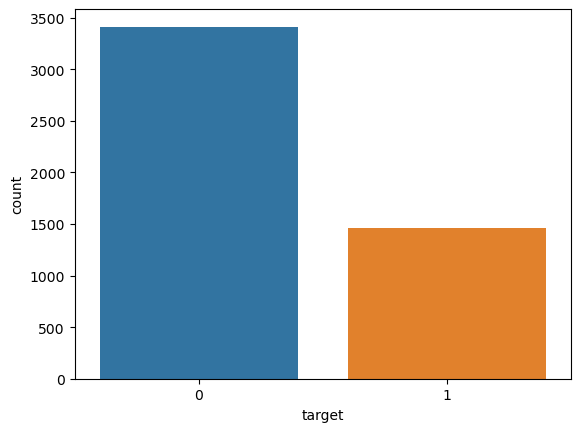

In [69]:
#This chat shows how the target are classified. There are more "not rolled over" loans, 0, than loan rolled over, 1.
sns.countplot(x="target", data=df)

In [70]:
#Count of the target outcomes
df["target"].value_counts()

0    3413
1    1460
Name: target, dtype: int64

In [71]:
# Percentage of the target outcomes
df["target"].value_counts()*100/len(df)

0    70.03899
1    29.96101
Name: target, dtype: float64

In [72]:
# Checking the variables with the best correlation in the dataset
df.corr()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,target
loan_id,1.000000,-0.030724,-0.000675,-0.060956,-0.011861,-0.016304,0.014253,0.044966,0.006515
monthly_income,-0.030724,1.000000,0.025765,0.157018,0.750378,0.754162,0.034940,-0.016172,-0.049122
origination_score_band,-0.000675,0.025765,1.000000,-0.002932,0.018781,0.017163,-0.001301,-0.015659,0.104942
TOB_months,-0.060956,0.157018,-0.002932,1.000000,0.019371,0.116784,0.020986,-0.442488,0.042655
closing_principal_balance,-0.011861,0.750378,0.018781,0.019371,1.000000,0.981470,0.045553,0.042369,-0.038322
original_loan_amount,-0.016304,0.754162,0.017163,0.116784,0.981470,1.000000,0.024656,-0.012028,-0.038077
original_loan_term,0.014253,0.034940,-0.001301,0.020986,0.045553,0.024656,1.000000,0.793162,-0.004111
remaining_loan_term,0.044966,-0.016172,-0.015659,-0.442488,0.042369,-0.012028,0.793162,1.000000,0.001385
target,0.006515,-0.049122,0.104942,0.042655,-0.038322,-0.038077,-0.004111,0.001385,1.000000


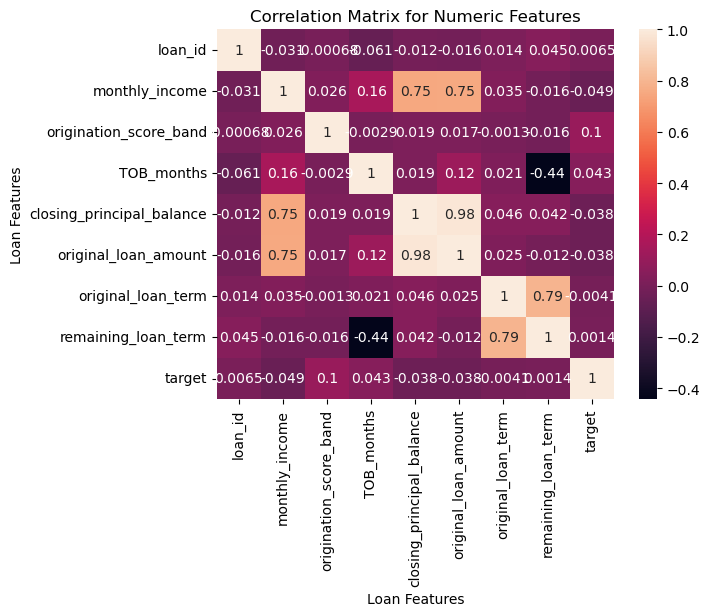

In [73]:
correlation_matrix = df.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Loan Features')

plt.ylabel('Loan Features')

plt.show()

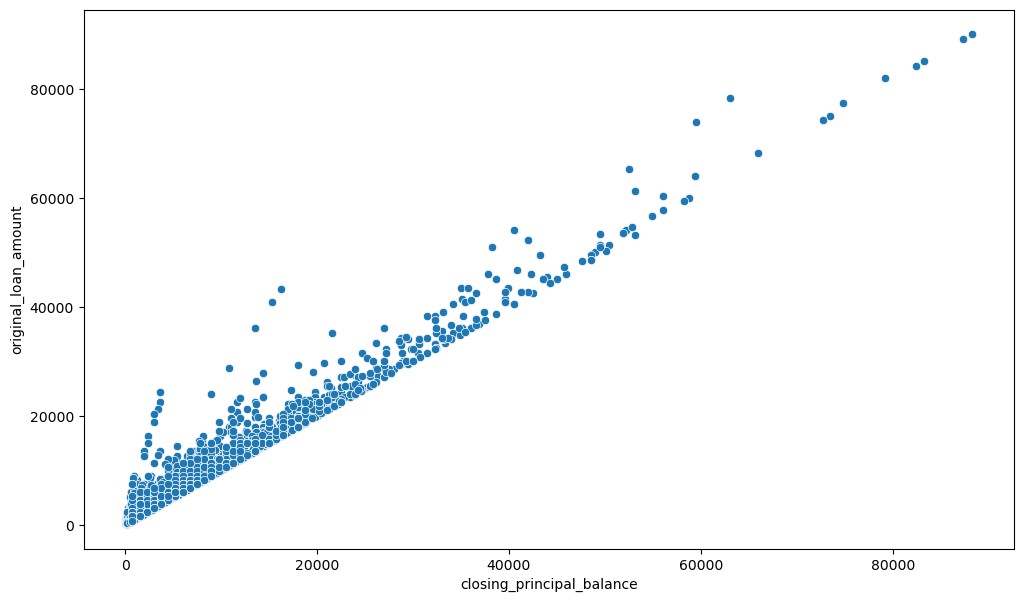

In [74]:
# Graph showing the correlated variables in the dataset
plt.figure(figsize=(12,7))
sns.scatterplot(x="closing_principal_balance", y="original_loan_amount", data=df)
plt.show()

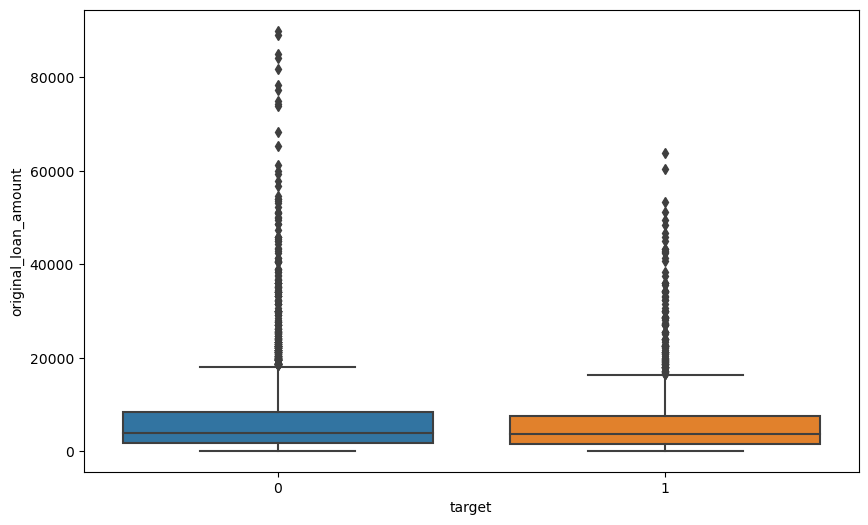

In [75]:
# Graph showing the "target" against the "original_loan_amount" variables in the dataset
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="target", y="original_loan_amount", data=df)
plt.show()

In [76]:
df.groupby("target")["original_loan_amount"].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,3413.0,6899.958980,8971.159407,100.0,1800.0,4000.0,8400.0,90000.0
1,1460.0,6184.116438,7689.880551,100.0,1610.0,3600.0,7500.0,63900.0


In [77]:
# To get the unique items in "product" variable in the dataset
df["product"].unique()

array(['B', 'A', 'C', 'D'], dtype=object)

<AxesSubplot:xlabel='product', ylabel='count'>

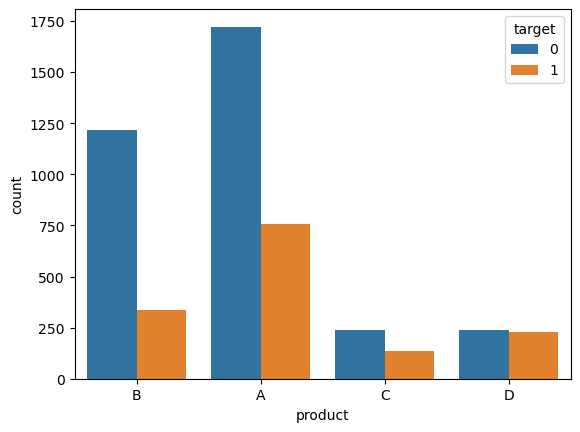

In [78]:
# Graph showing the "product" in hue of the "target" variables in the dataset
sns.countplot(x="product", hue="target", data=df)

In [79]:
#Have the mentioned variables data as x
x = df[["monthly_income", "origination_score_band", "TOB_months", "closing_principal_balance", "original_loan_amount", "original_loan_term", "remaining_loan_term"]].values

In [80]:
#Have the target data as y
y = df["target"].values
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [81]:
#Import Libraries for train_test_split
from sklearn.model_selection import train_test_split

In [82]:
# Split the data into training and test set. We use 30% test data with a random state of 30 
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [83]:
#Defining my Logistic Regression Classification model prediction
#lr = LogisticRegression()
#lr.fit(X_train, y_train)
#print("test accuracy {}".format(lr.score(X_test, y_test)))

#lr_score=lr.score(X_test, y_test)

In [84]:
#Defining my Logistic Regression Classification model prediction
model = LogisticRegression()
model_fit = model.fit(X_train,y_train)
y_predict = model.predict(X_test)
model.score(X_train,y_train)


0.7103488712987394

In [85]:
#Import Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [86]:
#Evaluate model performance
accuracy = accuracy_score(y_test, y_predict)
accuracy * 100

68.33105335157319

In [87]:
confusion_matrix(y_test,y_predict)

#TP FP
#FN TN

array([[997,   0],
       [463,   2]], dtype=int64)

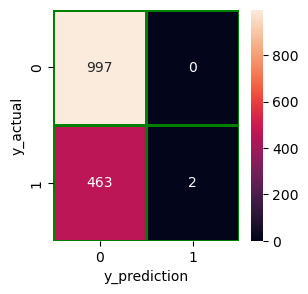

In [88]:
cm = confusion_matrix(y_test, y_predict)

# heatmap visulization of confusion matrix
f, ax = plt.subplots(figsize =(3, 3))
sns.heatmap(cm, annot = True, linewidth=1, linecolor="green", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()  

In [89]:
# Decision tree approach
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

print("score: ", dt.score(X_test, y_test))

dt_score = dt.score(X_test, y_test)

score:  0.9945280437756497


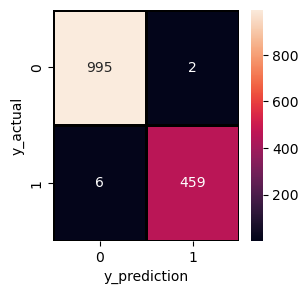

In [90]:
# confsion matrix
y_prediction = dt.predict(X_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# heatmap
f, ax = plt.subplots(figsize = (3, 3))
sns.heatmap(cm, annot = True, linewidths=1, linecolor="black", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [91]:
# random forest classification
from sklearn.ensemble import RandomForestClassifier
# set n_estimators to 100 whcih means the model will use 100 subsets
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
print("random forest model score: ", rf.score(X_test, y_test))
rf_score= rf.score(X_test, y_test)

random forest model score:  0.9835841313269493


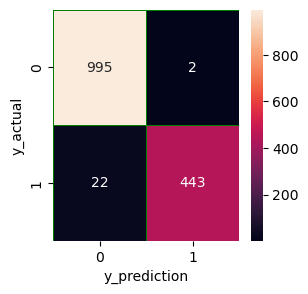

In [92]:
# confusion matrix
y_prediction = rf.predict(X_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# Heatmap
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [93]:
# SVM approach
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(X_train, y_train)

print("Accuracy of SVM: ", svm.score(X_test, y_test))

svm_score = svm.score(X_test, y_test)

Accuracy of SVM:  0.6819425444596443


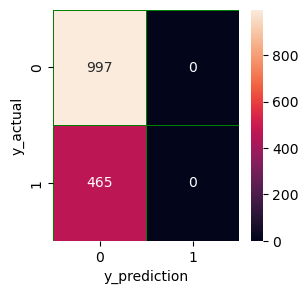

In [94]:
# Confusion matrix
y_prediction = svm.predict(X_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# Heatmap
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [95]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

print("accuracy of naive bayes: ", nb.score(X_test, y_test))

nb_score = nb.score(X_test, y_test)

accuracy of naive bayes:  0.6566347469220246


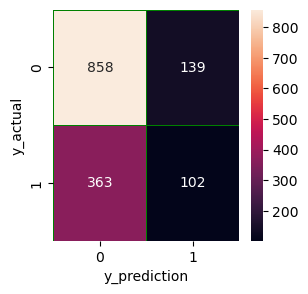

In [96]:
# Confusion matrix
y_prediction = nb.predict(X_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# heatmap
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [97]:
# Loading the XGBoost package
!pip3 install xgboost

In [98]:
#Import Libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [99]:
# Split the data into training and test set. We use 30% test data with a random state of 30 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [100]:
#Defining my Logistic Regression Classification model prediction
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("test accuracy {}".format(xgb.score(X_test, y_test)))

xgb_score=xgb.score(X_test, y_test)

test accuracy 0.9989743589743589


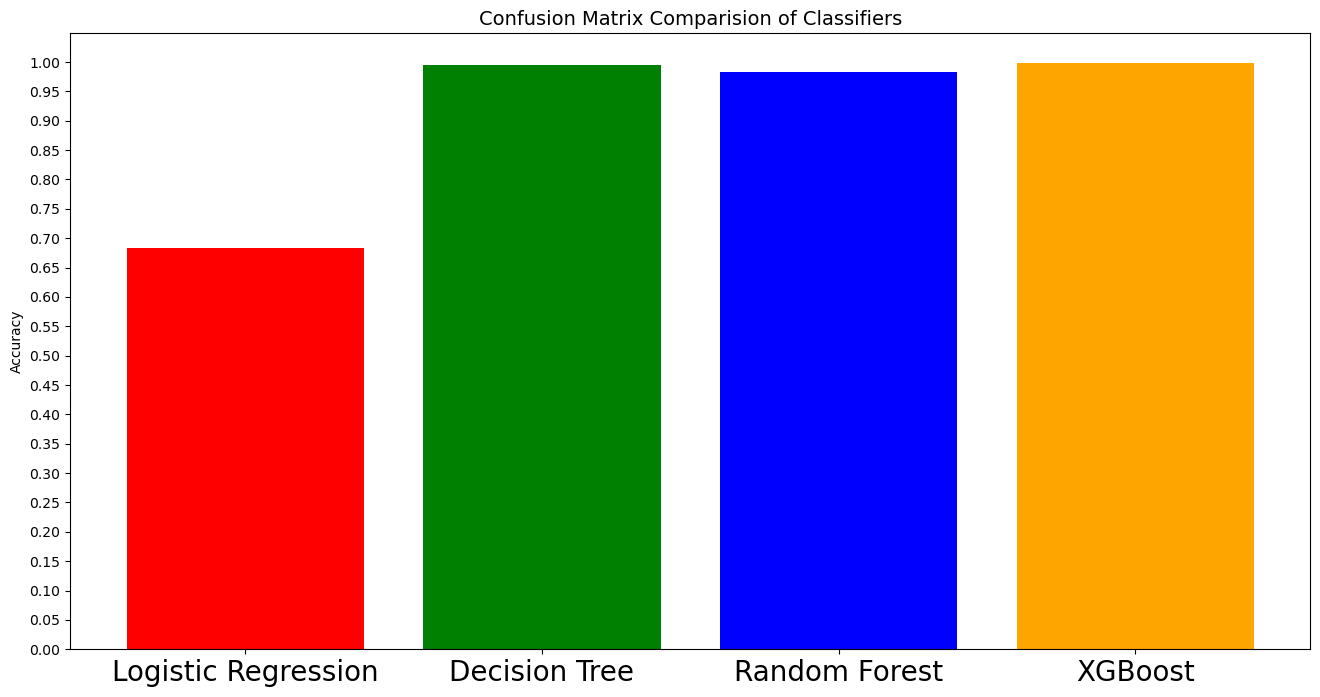

In [105]:
#Comparision Using Confusion matrix
#Below I visualize all confusion matrices to all classifiers

class_name = ("Logistic Regression", "Decision Tree", "Random Forest", "XGBoost")
class_score = (lr_score, dt_score, rf_score, xgb_score)
y_pos = np.arange(len(class_score))
colors = ("red", "green","blue", "orange")
plt.figure(figsize=(16, 8))
plt.bar(y_pos, class_score, color=colors)
plt.xticks(y_pos, class_name, fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step = 0.05))
plt.ylabel("Accuracy")

plt.title("Confusion Matrix Comparision of Classifiers", fontsize=14)
plt.savefig("graph.png")
plt.show()